In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data= pd.read_csv('data/boston.csv')

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
del data['chas']

In [8]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
medv = data['medv']
del data['medv']

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
scaler =StandardScaler()

In [17]:
scaler.fit(data)

scaler_data = scaler.transform(data)

In [27]:
# transform() 함수를 사용하여 NaN이 아닌 원소의 '개수(count)', '합(sum)', '최대값(max)'을 계산하여 

In [23]:
pca =PCA(n_components = 2)

In [22]:
pca.fit(scaler_data)

PCA(n_components=2)

In [26]:
pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [30]:
data2 = pd.DataFrame(data= pca.transform(scaler_data), columns= ['pc1', 'pc2'])

In [31]:
data2

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919
...,...,...
501,-0.313721,-1.143840
502,-0.109236,-1.326699
503,-0.311283,-1.395246
504,-0.269391,-1.350590


In [32]:
from sklearn.cluster import KMeans

In [35]:
x = [] # k가 몇개인지
y = [] # 응집도가 몇인지

for k in range(1,30) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    
    x.append(k)
    y.append(kmeans.inertia_)

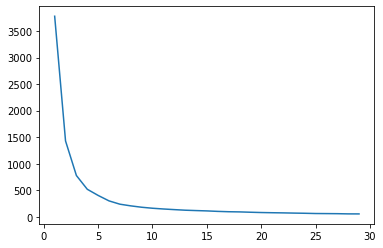

In [36]:
plt.plot(x, y)

In [38]:
Kmeans = KMeans(n_clusters=4)

In [39]:
Kmeans.fit(data2)

KMeans(n_clusters=4)

In [41]:
data2['labels']= Kmeans.predict(data2)

In [42]:
data2

,pc1,pc2,labels
0,-2.097234,-0.720179,0
1,-1.456003,-0.947694,0
2,-2.073454,-0.625336,0
3,-2.610161,-0.134044,0
4,-2.456866,-0.229919,0
...,...,...,...
501,-0.313721,-1.143840,3
502,-0.109236,-1.326699,3
503,-0.311283,-1.395246,3
504,-0.269391,-1.350590,3


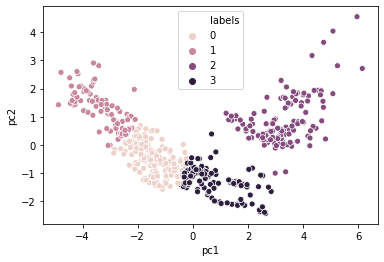

In [44]:
sns.scatterplot(x= 'pc1', y='pc2', hue='labels', data = data2)

In [45]:
data2['medv'] = medv

In [46]:
data2.head()

,pc1,pc2,labels,medv
0,-2.097234,-0.720179,0,24.0
1,-1.456003,-0.947694,0,21.6
2,-2.073454,-0.625336,0,34.7
3,-2.610161,-0.134044,0,33.4
4,-2.456866,-0.229919,0,36.2


In [48]:
mdedv_0 = data2[data2['labels']==0]['medv'].mean()
mdedv_1 = data2[data2['labels']==1]['medv'].mean()
mdedv_2 = data2[data2['labels']==2]['medv'].mean()
mdedv_3 = data2[data2['labels']==3]['medv'].mean()

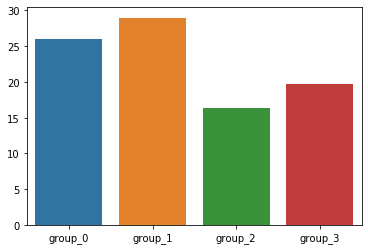

In [49]:
sns.barplot(x = ['group_0','group_1','group_2','group_3'], y = [mdedv_0, mdedv_1, mdedv_2, mdedv_3])